<a href="https://colab.research.google.com/github/MiheeChoi/git__test/blob/main/CNN02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load packages

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

# MNIST train, test dataset 가져오기

In [ ]:
# "" 현재 폴더에 MNIST 있음
mnist_train=dset.MNIST("", train=True, transform=transforms.ToTensor(), target_transform=None, download=True) #train 용
mnist_test=dset.MNIST("", train=False, transform=transforms.ToTensor(), target_transform=None, download=True) #test 용

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  5


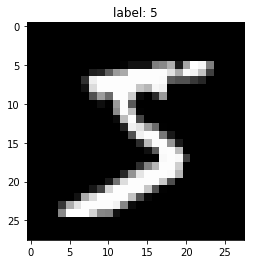

In [ ]:
print "mnist_train 길이:", len(mnist_train)
print "mnist_test 길이:", len(mnist_test)

#데이터 하나 형태
image, label = mnist_train.__getitem__(0) #0번째 데이터
print "image data 형태:", image.size()
print "label: ", label

#그리기
img = image.numpy() #image 타입을 numpy 로 변환 (1.28.28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

# MNIST data 띄워보기

5
torch.Size([1, 28, 28])
5


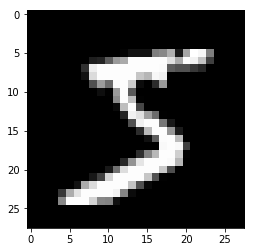

0


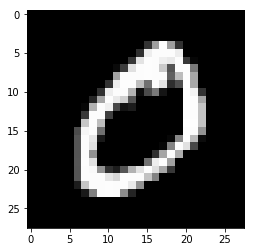

4


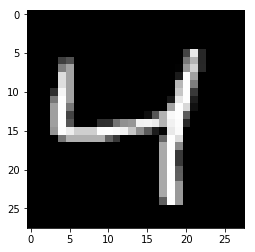

In [ ]:
print(mnist_train[0][1]) #label
print(mnist_train[0][0].size()) #image

for i in range(3):
    img=mnist_train[i][0].numpy()
    print(mnist_train[i][1])
    plt.imshow(img[0],cmap='gray')
    plt.show()

# convolution 하나 씌워보기

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


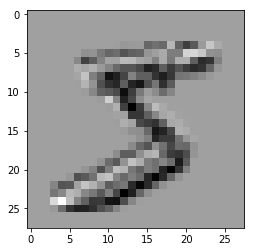

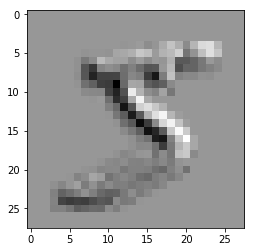

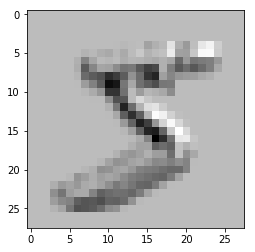

In [ ]:
#mnist 의 첫번 째 이미지, 라벨 가져오기
image, label = mnist_train[0]
#view: tensor의 사이즈 조절. -1:해당 차원 차원 확장시켜라
#[1,28,28] -> [1,1,28,28]
image=image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print label

#convolutional filter 정의
conv_layer=nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
output=conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(),cmap='gray')
    plt.show()

# # CNN 만들기

# train, test data 가져오기

In [ ]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate=0.0002
num_epoch = 10 #1000

In [ ]:
#후에 학습시킬 때 batch_size 단위로 학습시켜나감
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size, shuffle=True, 
                                           num_workers=2, drop_last=True) # batch_size 만큼 나눌 때 나머지는 버려라
test_loader = torch.utils.data.DataLoader((mnist_test), batch_size=batch_size, shuffle=False, 
                                           num_workers=2, drop_last=True) 

# CNN 클래스 만들기(모델 만들기)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer=nn.Sequential(           
            nn.Conv2d(1,16,5,padding=2),
            nn.ReLU(),

            nn.Conv2d(16,32,5,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(32,64,5,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*7*7, 100),
            nn.ReLU(),
            nn.Linear(100,10)

        )
        
    def forward(self, x):        
        out = self.layer(x)
        out = out.view(batch_size,-1)
        out = self.fc_layer(out)
        return out
    
model=CNN() #.cuda()

In [ ]:
# 파라미터 체크하기
for parameter in model.parameters():
    #print(parameter)
    print(parameter.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [ ]:
# loss function, optimizer 선언
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# optimization

In [ ]:
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        x=Variable(image) #.cuda()
        y_=Variable(label) #.cuda()

        optimizer.zero_grad()
        output=model.forward(x)
        loss=loss_func(output,y_)
        loss.backward()
        optimizer.step()


        if j%50==0:
            print(loss, j, i)

(tensor(2.3121, grad_fn=<NllLossBackward>), 0, 0)
(tensor(1.5459, grad_fn=<NllLossBackward>), 50, 0)
(tensor(0.3897, grad_fn=<NllLossBackward>), 0, 1)
(tensor(0.8367, grad_fn=<NllLossBackward>), 50, 1)
(tensor(0.8951, grad_fn=<NllLossBackward>), 0, 2)
(tensor(0.2493, grad_fn=<NllLossBackward>), 50, 2)
(tensor(0.1570, grad_fn=<NllLossBackward>), 0, 3)
(tensor(0.0487, grad_fn=<NllLossBackward>), 50, 3)
(tensor(0.4520, grad_fn=<NllLossBackward>), 0, 4)
(tensor(0.0204, grad_fn=<NllLossBackward>), 50, 4)
(tensor(0.1197, grad_fn=<NllLossBackward>), 0, 5)
(tensor(0.0902, grad_fn=<NllLossBackward>), 50, 5)
(tensor(0.0787, grad_fn=<NllLossBackward>), 0, 6)
(tensor(0.0079, grad_fn=<NllLossBackward>), 50, 6)
(tensor(0.0390, grad_fn=<NllLossBackward>), 0, 7)
(tensor(0.1323, grad_fn=<NllLossBackward>), 50, 7)
(tensor(0.1096, grad_fn=<NllLossBackward>), 0, 8)
(tensor(0.2074, grad_fn=<NllLossBackward>), 50, 8)
(tensor(0.0297, grad_fn=<NllLossBackward>), 0, 9)
(tensor(0.0456, grad_fn=<NllLossBackward>

In [ ]:
# 모델 저장시키기
torch.save(model, 'nets/mycnn_model_%d.pkl'%(num_epoch))

In [ ]:
try:
    # 미리 학습시킨 네크워크의 파라미터 집합 [피클]이라 발음함.
    model=torch.load('nets/mycnn_model_10.pkl')
    print("model restored")
except:
    print("model not restored")

model restored


In [ ]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0
    
    for j, [imgs, labels] in enumerate(dloader):
        img = Variable(imgs) #.cuda() #x
        label = Variable(labels)
        
        output = imodel.forward(img)
        _, output_index = torch.max(output, 1)
        
        total += label.size(0)
        correct += (output_index == label).sum().float()
    print("Accuracy of Test Data : {}".format(100*correct/total))

In [ ]:
ComputeAccr(test_loader, model)

Accuracy of Test Data : 94.8700027466
